# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
#pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math
import spacy
import lucem_illud_2020 
from sklearn.metrics import plot_confusion_matrix

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [67]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

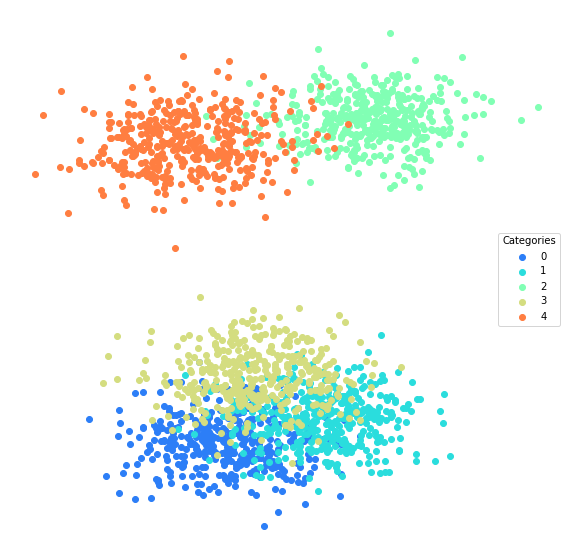

In [68]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [37]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

Now we fit the model by giving it our training data

In [38]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

E:\software\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [39]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.105,0.896728,0.929293,0.876556,0.867925
1,0.105,0.896728,0.861386,0.832240,0.925532


This lets us look at which classes do better:

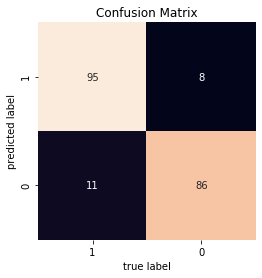

In [21]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

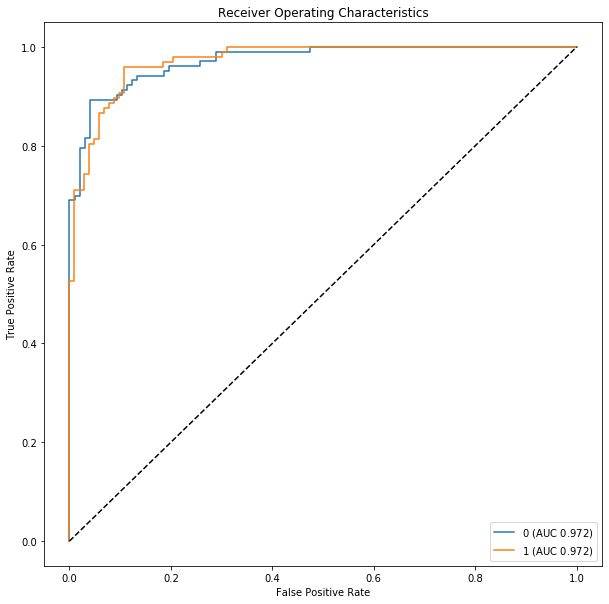

In [22]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

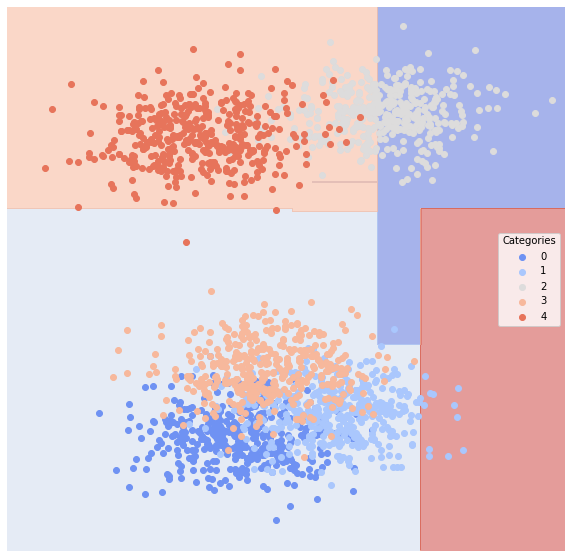

In [69]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [23]:
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())
#del dfTrain
#del dfTest

In [27]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [26]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

E:\software\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Bad Roommates,0.257053,0.5,0.000000,0.257053,0.0
Tales From Tech Support,0.257053,0.5,0.000000,0.257053,0.0
Weeaboo Tales,0.761755,0.5,0.238245,0.238245,1.0
Relationships,0.247649,0.5,0.000000,0.247649,0.0


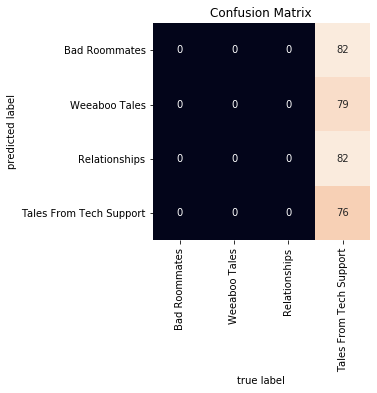

In [28]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

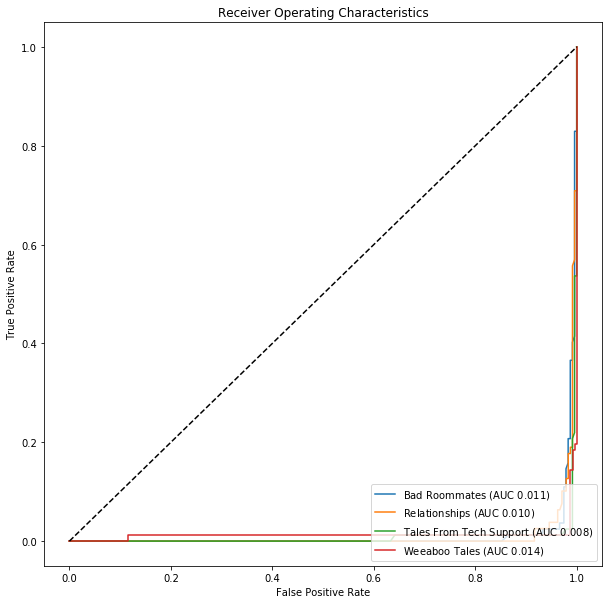

In [29]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

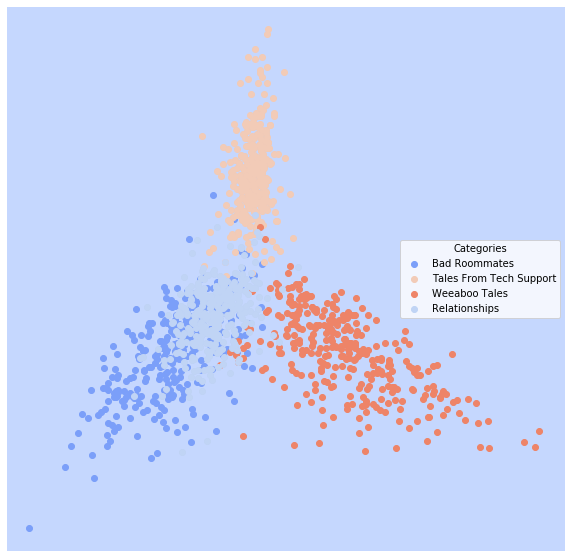

In [30]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [11]:
#1 the 10 generated artificial datasets:
import sklearn.preprocessing 
random.seed(0)
dfTrain1, dfTest1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
dfTrain2, dfTest2 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(0.1))
dfTrain3, dfTest3 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(0.1)) #Please try this one
dfTrain4, dfTest4 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(0.1))
dfTrain5, dfTest5 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(0.1))
dfTrain6, dfTest6 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(0.2))
dfTrain7, dfTest7 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(0.2)) #Please try this one
dfTrain8, dfTest8 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(0.2))
dfTrain9, dfTest9 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(0.2))
dfTrain10, dfTest10 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(0.3))
TrainSet=[dfTrain1,dfTrain2,dfTrain3,dfTrain4,dfTrain5,dfTrain6,dfTrain7,dfTrain8,dfTrain9,dfTrain10]
TestSet=[dfTest1,dfTest2,dfTest3,dfTest4,dfTest5,dfTest6,dfTest7,dfTest8,dfTest9,dfTest10]
clfdict={'a1': sklearn.naive_bayes.GaussianNB(),'a2':sklearn.svm.SVC(kernel = 'linear', probability = True),
         'a3':sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),'a4':sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
        'a5':sklearn.linear_model.LogisticRegression(max_iter=400),'a6':sklearn.tree.DecisionTreeClassifier(),'a7':sklearn.ensemble.RandomForestClassifier(),
        'a8':sklearn.neural_network.MLPClassifier(max_iter=800),'a9':sklearn.ensemble.GradientBoostingClassifier()}

RandomDataComparison=pandas.DataFrame(columns=['index','min_error_rate_method','min_error_rate','max_auc_method','max_auc'])
for i in range(0,10):
    Train=TrainSet[i]
    Test=TestSet[i]
    minerrorrate=1
    erroritem='x'
    maxauc=0
    aucitem='y'
    for j in range(1,10):
        clf=clfdict['a'+str(j)]
        clf.fit(np.stack(Train['vect'], axis=0), Train['category'])
        result=lucem_illud_2020.evaluateClassifier(clf, Test)
        error_rate=np.mean(list(result['Error_Rate']))
        auc=np.mean(list(result['AUC']))
        if error_rate<minerrorrate:
            minerrorrate=error_rate
            erroritem=str(clf)
        if auc>maxauc:
            maxauc=auc
            aucitem=str(clf)
    RandomDataComparison=RandomDataComparison.append({'index':i+1,'min_error_rate_method':erroritem,'min_error_rate':minerrorrate,'max_auc_method':aucitem,'max_auc':maxauc},ignore_index=True)
RandomDataComparison.set_index("index",inplace=True)
print(RandomDataComparison)
print(" ")
print(" ")
print ("Thus, we can find out which is the best model for each database and also our basis for evaluation.")
print("For randomly generated data (index=1), no model works well because there is no pattern.")
print("Generally speaking, Naive Bayes, Tree, SVC and RandomForest work well with the dataset with approximately linear boundaries,")
print("while other methods perform well on both linear and curve boundaries.")
print("However, since there is change to the dataset everytime (and also change to train/test split),")
print("The best method for each dataset changes every time we re-run the program.")

                                   min_error_rate_method  min_error_rate  \
index                                                                      
1      SVC(C=1.0, break_ties=False, cache_size=200, c...          0.4750   
2      SVC(C=1.0, break_ties=False, cache_size=200, c...          0.0550   
3      GradientBoostingClassifier(ccp_alpha=0.0, crit...          0.0300   
4           GaussianNB(priors=None, var_smoothing=1e-09)          0.0350   
5           GaussianNB(priors=None, var_smoothing=1e-09)          0.0000   
6      SVC(C=1.0, break_ties=False, cache_size=200, c...          0.1000   
7      MLPClassifier(activation='relu', alpha=0.0001,...          0.0700   
8      MLPClassifier(activation='relu', alpha=0.0001,...          0.1150   
9           GaussianNB(priors=None, var_smoothing=1e-09)          0.0616   
10     SVC(C=1.0, break_ties=False, cache_size=200, c...          0.0376   

                                          max_auc_method   max_auc  
index             

In [3]:
clfdict={'a1': sklearn.naive_bayes.GaussianNB(),'a2':sklearn.svm.SVC(kernel = 'linear', probability = True),
         'a3':sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True),'a4':sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
        'a5':sklearn.linear_model.LogisticRegression(),'a6':sklearn.tree.DecisionTreeClassifier(),'a7':sklearn.ensemble.RandomForestClassifier(),
        'a8':sklearn.neural_network.MLPClassifier(),'a9':sklearn.ensemble.GradientBoostingClassifier()}
datadict={'d1':lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups()),'d2':lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall()),
        'd3':lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge()),'d4':lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())}

random.seed(0)
EmpericalDataComparison=pandas.DataFrame(columns=['index','min_error_rate_method','min_error_rate','max_auc_method','max_auc'])
for i in range(1,5):
    Train,Test=datadict['d'+str(i)]
    minerrorrate=1
    erroritem='x'
    maxauc=0
    aucitem='y'
    for j in range(1,10):
        clf=clfdict['a'+str(j)]
        clf.fit(np.stack(Train['vect'], axis=0), Train['category'])
        result=lucem_illud_2020.evaluateClassifier(clf, Test)
        error_rate=np.mean(list(result['Error_Rate']))
        auc=np.mean(list(result['AUC']))
        if error_rate<minerrorrate:
            minerrorrate=error_rate
            erroritem=str(clf)
        if auc>maxauc:
            maxauc=auc
            aucitem=str(clf)
    EmpericalDataComparison=EmpericalDataComparison.append({'index':i,'min_error_rate_method':erroritem,'min_error_rate':minerrorrate,'max_auc_method':aucitem,'max_auc':maxauc},ignore_index=True)
    del Train
    del Test
    
EmpericalDataComparison.set_index("index",inplace=True)

print(EmpericalDataComparison)
print(" ")
print(" ")
print("From this table, we can see the best methods for different datasets.")
print("Since the train/test split for each dataset changes, the best methods change while we re-run the codes.")
print("However, generally speaking, ensemble methods works best since they are based on some other basic methods.")


Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors
                                   min_error_rate_method  min_error_rate  \
index                                                                      
1      LogisticRegression(C=1.0, class_weight=None, d...        0.054255   
2      RandomForestClassifier(bootstrap=True, ccp_alp...        0.002933   
3      GradientBoostingClassifier(ccp_alpha=0.0, crit...        0.000513   
4      RandomForestClassifier(bootstrap=True, ccp_alp...        0.086257   

                                          max_auc_method   max_auc  
index                                                               
1      LogisticRegress

In [13]:
#3. new method (Stochastic Gradient Descent)
from sklearn.linear_model import SGDClassifier
aTrain, aTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(0.1))
eTrain, eTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
clf= SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clf.fit(np.stack(aTrain['vect'], axis=0), aTrain['category'])
aresult=lucem_illud_2020.evaluateClassifier(clf, aTest)
clf= SGDClassifier(loss="hinge", penalty="l2", max_iter=100)
clf.fit(np.stack(eTrain['vect'], axis=0), eTrain['category'])
eresult=lucem_illud_2020.evaluateClassifier(clf, eTest)
print(aresult)
print(" ")
print(eresult)
print(" ")
print(" ")
print("Thus, we can see from the result that SGD works quite well with the emperical database(senator, small),")
print("but not so accurate with the artificial dataset (xorSplit, with a random rate of 0.1).")
print("It is a model updated along the way with a decreasing strength schedule (aka learning rate), and by default, it fits a linear SVM.")
print("Thus it generally perform better than linear SVM.")

Loading senate data
Converting to vectors
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.495  0.524038   0.492308           0.492308  1.000000
1              0.495  0.524038   1.000000           0.543077  0.048077
 
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Obama       0.017595  0.978571   1.000000           0.974738  0.957143
Clinton     0.017595  0.978571   0.971014           0.971014  1.000000
 
 
Thus, we can see from the result that SGD works quite well with the emperical database(senator, small),
but not so accurate with the artificial dataset (xorSplit, with a random rate of 0.1).
It is a model updated along the way with a decreasing strength schedule (aka learning rate), and by default, it fits a linear SVM.
Thus it generally perform better than linear SVM.


# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [31]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

Let's turn the 'targetSenator' column into a binary category variable.

In [32]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [33]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [34]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [35]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [36]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [37]:
TFVects.shape

(1368, 11153)

We can save this in the dataframe to make things easier

In [38]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [39]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [40]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


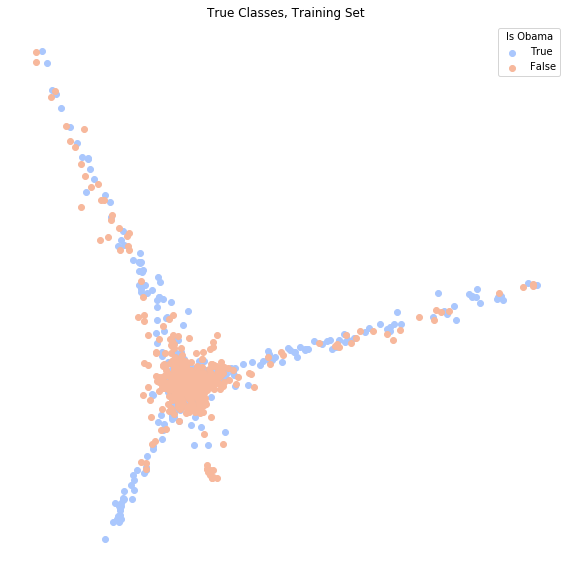

In [41]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

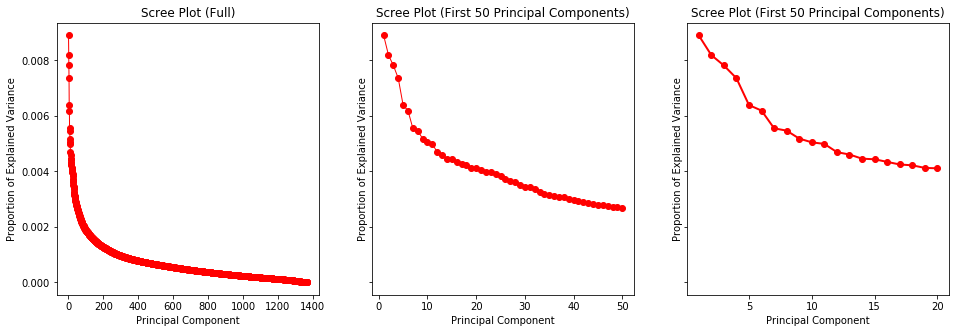

In [42]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [43]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [44]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [45]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6681286549707602

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [46]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6275659824046921

Slightly poorer. How about using more dimensions (40)?

In [47]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7595029239766082
Testing:
0.6979472140762464


Or still more (100)?

In [48]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8267543859649122
Testing:
0.7331378299120235


Or even more (200)!

In [49]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8640350877192983
Testing:
0.7683284457478006


This is becoming ridiculous (400)!

In [50]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9130116959064327
Testing:
0.7976539589442815


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [51]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9605263157894737


Train the model using training data, and then test it on the testing data.

In [52]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8152492668621701


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [53]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9590643274853801
Testing:
0.8357771260997068


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [55]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [56]:
sklearn.metrics.precision_score(test_data_df['nb_predict'], test_data_df['category'])

0.7483443708609272

Recall:

In [57]:
sklearn.metrics.recall_score(test_data_df['nb_predict'], test_data_df['category'])

0.8625954198473282

F1-measure:

In [58]:
sklearn.metrics.f1_score(test_data_df['nb_predict'], test_data_df['category'])

0.801418439716312

Let's take a look at how well our posterior distribution looks relative to the truth.

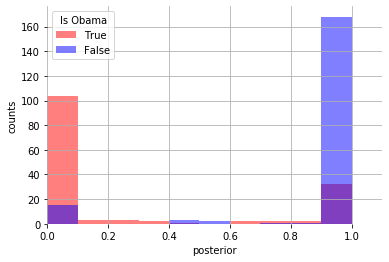

In [59]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [60]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,announcement,-2.268684,5566,-1.763589
1,welcomed,-2.305051,amy,-1.795337
2,fy,-2.355695,dick,-1.795337
3,welcome,-2.395435,brundage,-1.862029
4,honor,-2.409041,monday,-1.862029
5,urging,-2.409041,chicago,-2.010449
6,ground,-2.422834,temporary,-2.200802
7,class,-2.436820,location,-2.233592
8,urged,-2.436820,reported,-2.250399
9,environment,-2.451005,va,-2.267494


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [61]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [62]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [63]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [64]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [65]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [66]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [67]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [68]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8932095182820662


In [69]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
271,talk.religion.misc,talk.religion.misc
1363,sci.space,sci.space
431,soc.religion.christian,soc.religion.christian
253,talk.religion.misc,talk.religion.misc
997,sci.space,sci.space
1321,sci.space,sci.space
2097,comp.graphics,comp.graphics
1370,sci.space,sci.space
1247,sci.space,sci.space
901,soc.religion.christian,soc.religion.christian


Looks pretty good, lets examine the testing dataset:

In [70]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.7674418604651163


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

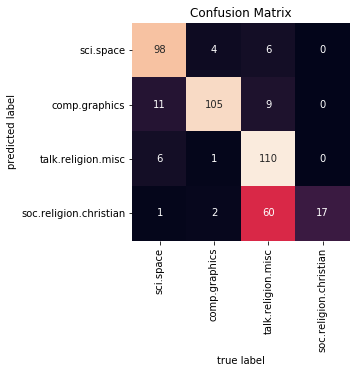

In [71]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [72]:
print(sklearn.metrics.precision_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #recall
print(sklearn.metrics.f1_score(test_ng_df['nb_predict'], test_ng_df['category'], average = 'weighted')) #F-1 measure

0.8764729841648446
0.7674418604651163
0.7941104212470735


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [73]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
talk.religion.misc,0.146512,0.606250,1.000000,0.359012,0.212500
soc.religion.christian,0.190698,0.850277,0.594595,0.575300,0.940171
comp.graphics,0.065116,0.925753,0.844828,0.789859,0.907407
sci.space,0.062791,0.908525,0.937500,0.834012,0.840000


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

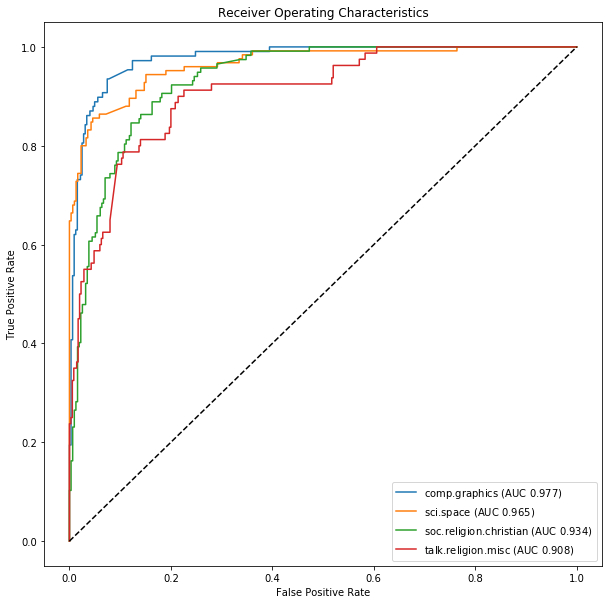

In [74]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

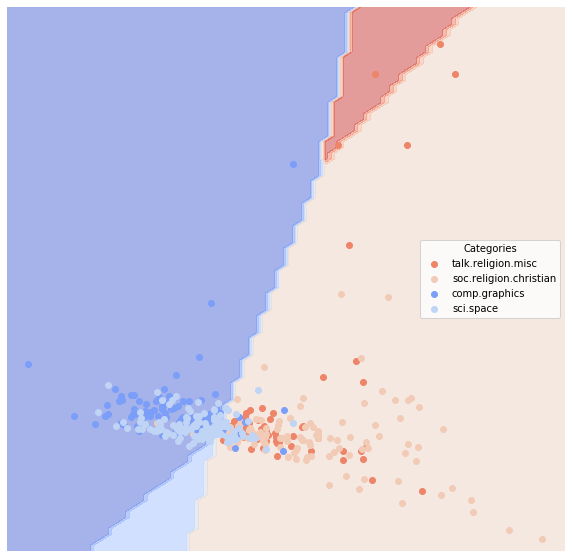

In [75]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


In this exercise I have chosen companies from 3 industries,trying to classify them based on their business descriptions.

For Train Data:
accuracy =0.9245230078563412
precision =0.9260985019214157
recall =0.9245230078563412
F1 measure=0.9244435929103251
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.063973  0.938618   0.900890           0.883203  0.961368
wholesale    0.062009  0.926214   0.926370           0.861488  0.889071
mining       0.024972  0.949613   0.977496           0.905066  0.904948
 
 
For Test Data:
accuracy =0.7955056179775281
precision =0.8020655359518486
recall =0.7955056179775281
F1 measure=0.7950600349495733
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.171910  0.832290   0.773913           0.735335  0.879012
wholesale    0.187640  0.782296   0.740214           0.615434  0.688742
mining       0.049438  0.889907   0.966443     

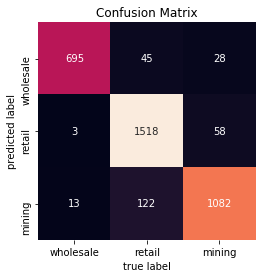

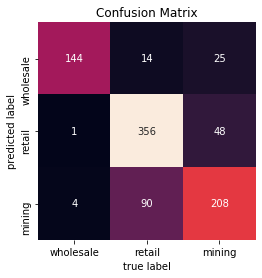

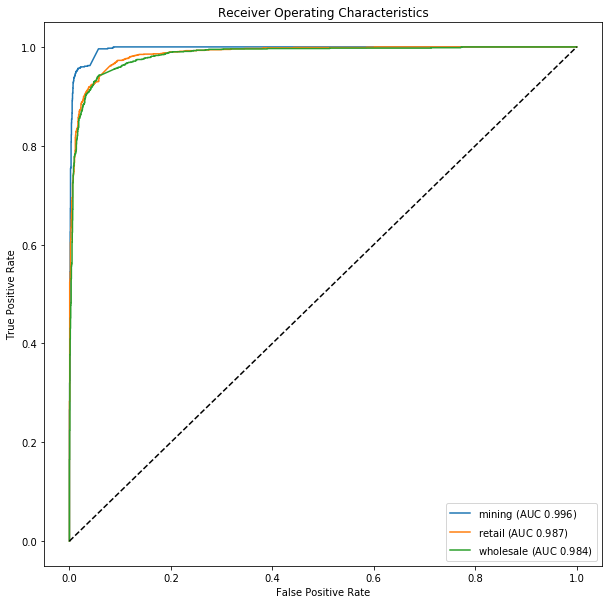

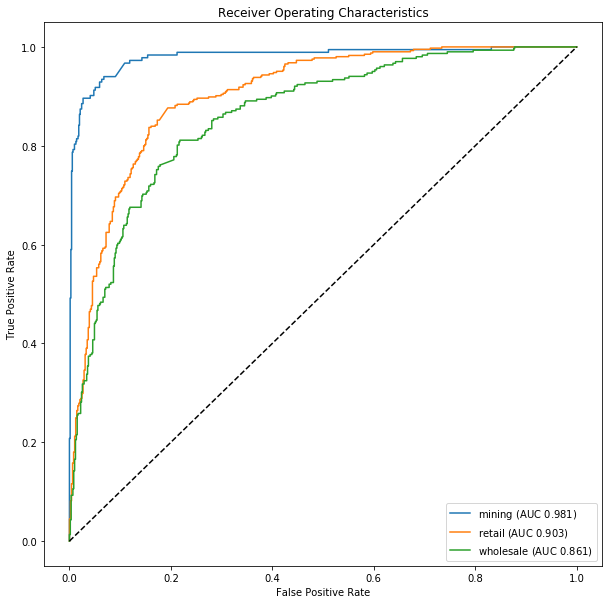

In [3]:
#1.Logistic
#data prepare (the classfier.csv has been uploaded as well.)
import os
os.chdir('C:/Users/Kun/Content-Analysis-2020')
dfnew=pandas.read_csv("classifier.csv")
dfnew.columns=['companyid','companybusinessdescriptionlong','category']
dfnew['tokenized_text'] = dfnew['companybusinessdescriptionlong'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
dfnew['normalized_text'] = dfnew['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(dfnew['companybusinessdescriptionlong'])
dfnew['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(dfnew, holdBackFraction=holdBackFraction)

#calculate
clf = sklearn.linear_model.LogisticRegression()
clf.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
train_data_df['predicted'] = clf.predict(np.stack(train_data_df['vect'], axis=0))
test_data_df['predicted'] = clf.predict(np.stack(test_data_df['vect'], axis=0))

print("For Train Data:")
print("accuracy ="+str(clf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, train_data_df))
print(" ")
print(" ")
print("For Test Data:")
print("accuracy ="+str(clf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, test_data_df))
print(" ")
print(" ")
print("Here is confusion matrix and ROC curve for Train and Test data:")
lucem_illud_2020.plotConfusionMatrix(clf, train_data_df)
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)
lucem_illud_2020.plotMultiROC(clf, train_data_df)
lucem_illud_2020.plotMultiROC(clf, test_data_df)

For Train Data:
accuracy =0.8684062850729517
precision =0.8740231186232793
recall =0.8684062850729517
F1 measure=0.8673371635855894
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.117845  0.888183   0.819636           0.797455  0.941102
wholesale    0.117003  0.852414   0.884615           0.752065  0.755957
mining       0.028339  0.944634   0.969058           0.891542  0.897135
 
 
For Test Data:
accuracy =0.7932584269662921
precision =0.7983762186427693
recall =0.7932584269662921
F1 measure=0.7907842536130352
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.176404  0.829388   0.760504           0.728074  0.893827
wholesale    0.195506  0.763459   0.750000           0.600417  0.635762
mining       0.041573  0.911057   0.962025     

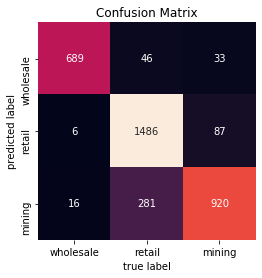

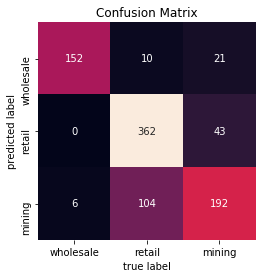

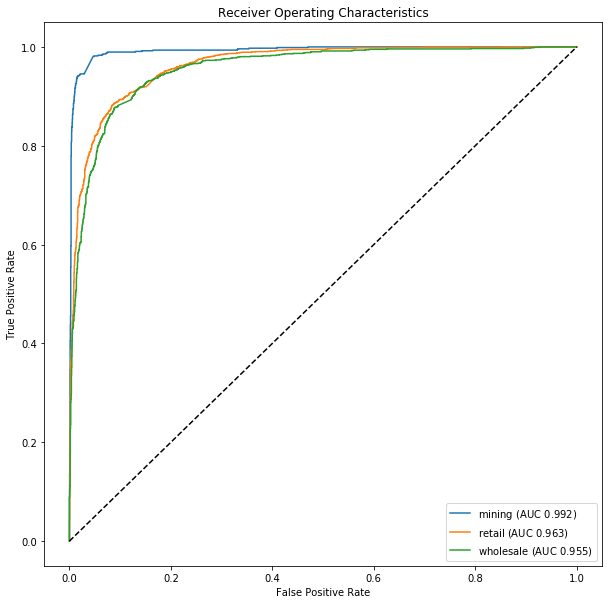

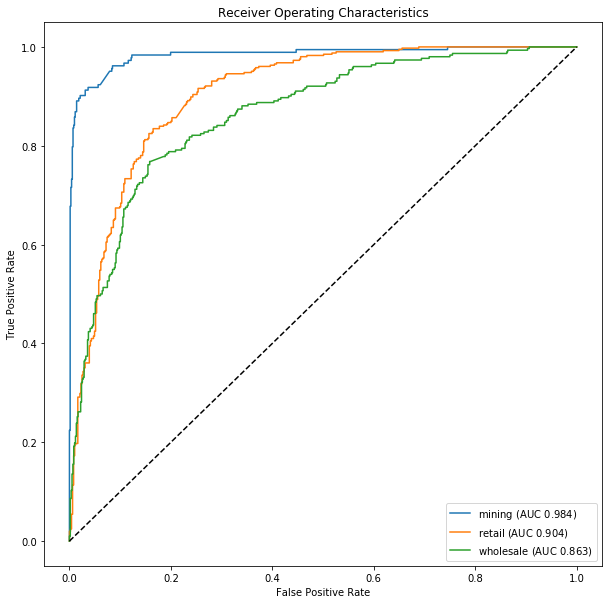

In [4]:
#2. NB
#data prepare: use the same train and test sets as logistic regression session.

#calculate
clf = sklearn.naive_bayes.MultinomialNB()
clf.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
train_data_df['predicted'] = clf.predict(np.stack(train_data_df['vect'], axis=0))
test_data_df['predicted'] = clf.predict(np.stack(test_data_df['vect'], axis=0))

print("For Train Data:")
print("accuracy ="+str(clf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, train_data_df))
print(" ")
print(" ")
print("For Test Data:")
print("accuracy ="+str(clf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, test_data_df))
print(" ")
print(" ")
print("Here is confusion matrix and ROC curve for Train and Test data:")
lucem_illud_2020.plotConfusionMatrix(clf, train_data_df)
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)
lucem_illud_2020.plotMultiROC(clf, train_data_df)
lucem_illud_2020.plotMultiROC(clf, test_data_df)

Comment:*Thus, we can see that NB and logistic have similar performance on this task (simialr F1 around 0.79-0.80 and accuracy around 0.79-0.80 for test set).
Logistic has a relatively higher precision.
It can be seen from the ROC curve that the fitting for training set is much better than testing set, which is normal because there are more samples in the training set. However, there is also a possibility of over-fitting. *

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

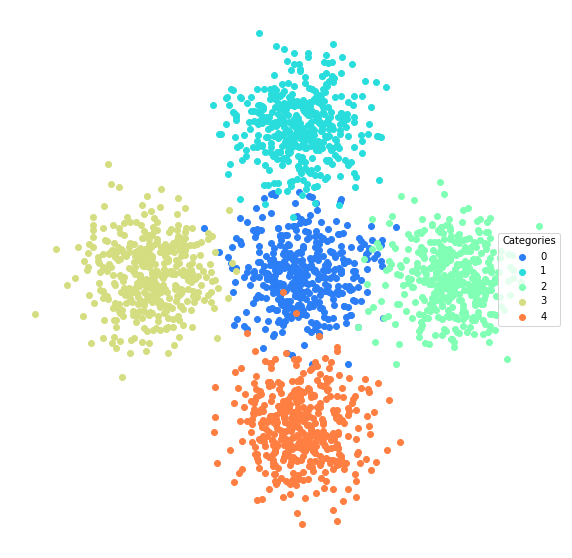

In [76]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [77]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

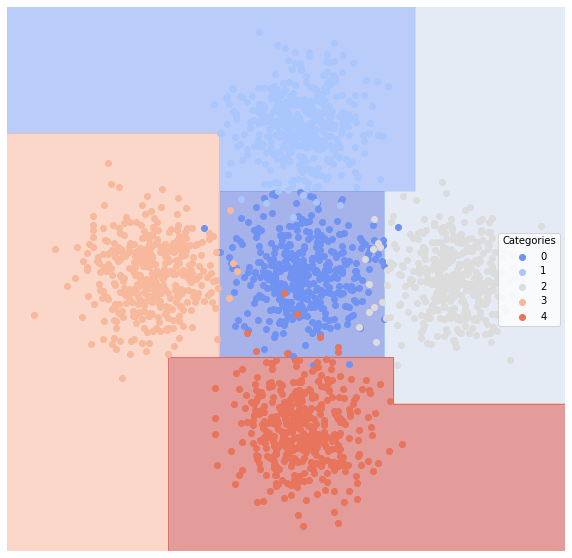

In [78]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [79]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.022,0.974611,0.921569,0.899067,0.969072
1,0.012,0.974469,0.989899,0.951846,0.951456
2,0.004,0.997423,0.982456,0.982456,1.000000
3,0.006,0.985714,1.000000,0.977429,0.971429
4,0.008,0.985554,0.975904,0.956388,0.975904


Lets look at accuracy:

In [80]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.974

What happens if we trim the tree?

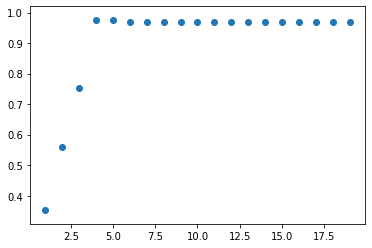

In [81]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [82]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [83]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

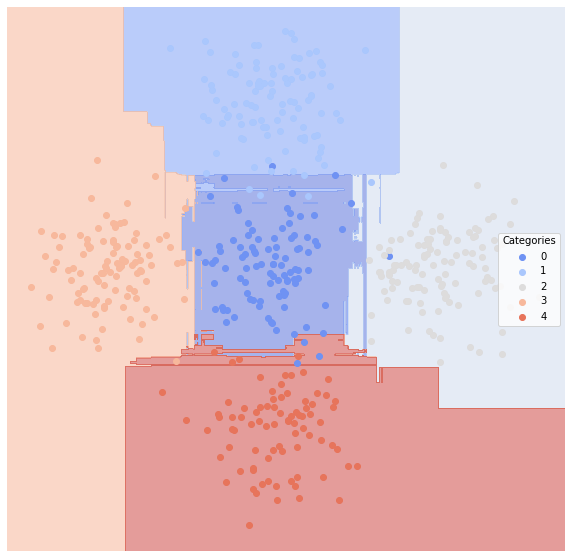

In [84]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [85]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.014,0.971745,0.978723,0.938274,0.948454
1,0.008,0.984177,0.990099,0.967261,0.970874
2,0.004,0.997423,0.982456,0.982456,1.000000
3,0.002,0.995238,1.000000,0.992476,0.990476
4,0.008,0.995204,0.954023,0.954023,1.000000


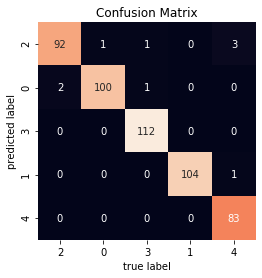

In [86]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

For Train Data:
accuracy =0.5948372615039281
precision =0.7863530748470634
recall =0.5948372615039281
F1 measure=0.508941785654041
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.404040  0.637215   0.523036           0.522985  0.999367
wholesale    0.317621  0.534922   1.000000           0.387465  0.069844
mining       0.088664  0.796632   0.989177           0.675874  0.595052
 
 
For Test Data:
accuracy =0.5775280898876405
precision =0.6477605564403478
recall =0.5775280898876405
F1 measure=0.4768886213490149
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.413483  0.619600   0.524246           0.523392  0.987654
wholesale    0.334831  0.510649   0.642857           0.348371  0.029801
mining       0.096629  0.781228   0.929204      

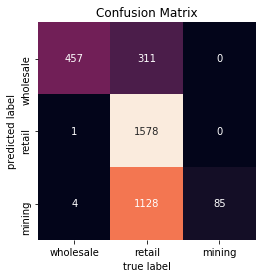

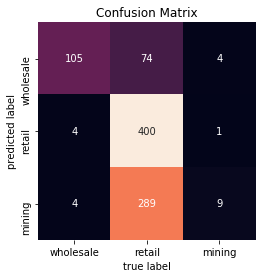

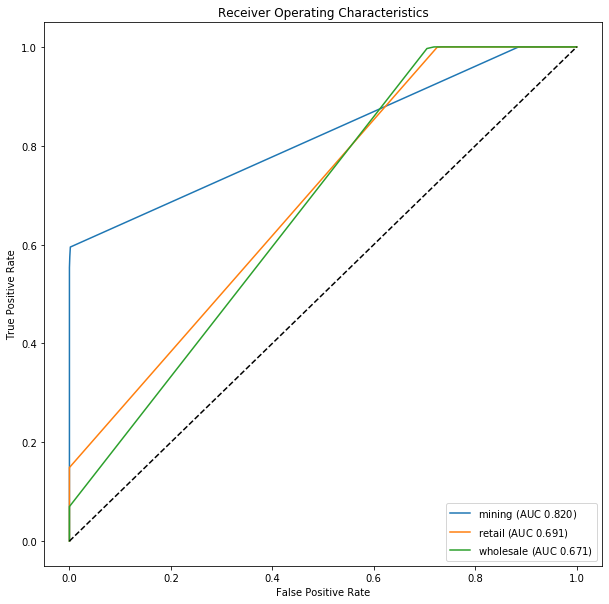

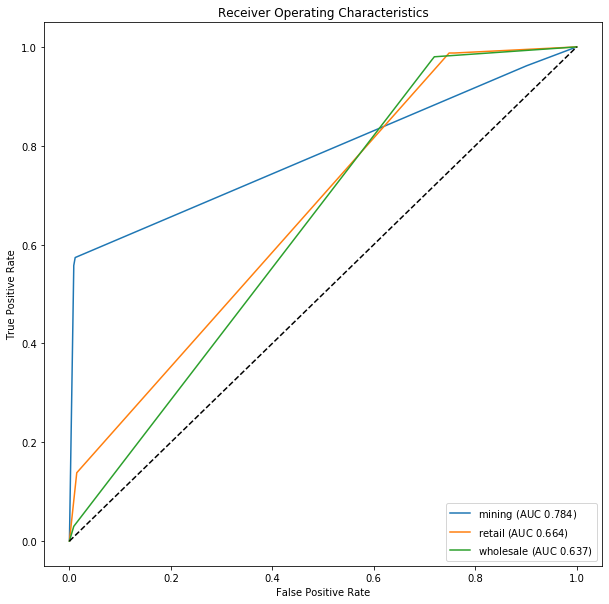

In [5]:
#1.Decision Tree (with max_dept=20, random_state=0)
#data prepare: use the same train and test sets as logistic regression session.

#calculate
clf=sklearn.tree.DecisionTreeClassifier(max_depth=20,random_state=0)
clf.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
train_data_df['predicted'] = clf.predict(np.stack(train_data_df['vect'], axis=0))
test_data_df['predicted'] = clf.predict(np.stack(test_data_df['vect'], axis=0))

print("For Train Data:")
print("accuracy ="+str(clf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, train_data_df))
print(" ")
print(" ")
print("For Test Data:")
print("accuracy ="+str(clf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, test_data_df))
print(" ")
print(" ")
print("Here is confusion matrix and ROC curve for Train and Test data:")
lucem_illud_2020.plotConfusionMatrix(clf, train_data_df)
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)
lucem_illud_2020.plotMultiROC(clf, train_data_df)
lucem_illud_2020.plotMultiROC(clf, test_data_df)

For Train Data:
accuracy =0.6938832772166106
precision =0.8126709095018168
recall =0.6938832772166106
F1 measure=0.6668449876228575
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.303872  0.727139   0.593233           0.593138  0.999367
wholesale    0.231201  0.663045   0.980440           0.552010  0.329499
mining       0.077160  0.821436   0.997980           0.718810  0.643229
 
 
For Test Data:
accuracy =0.647191011235955
precision =0.7250334856613693
recall =0.647191011235955
F1 measure=0.6028882071069962
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.339326  0.686623   0.574964           0.572003  0.975309
wholesale    0.286517  0.593920   0.770115           0.434898  0.221854
mining       0.079775  0.810061   0.982759       

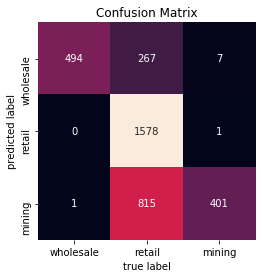

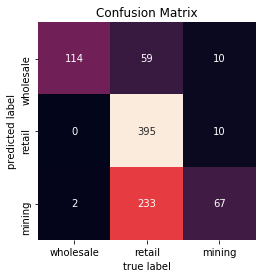

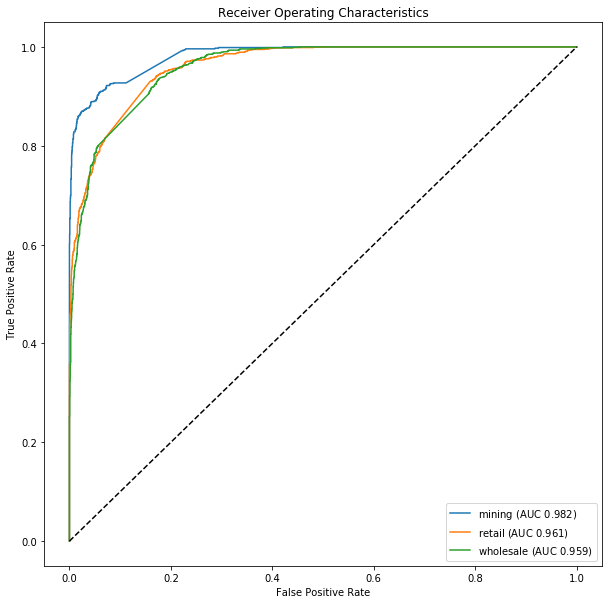

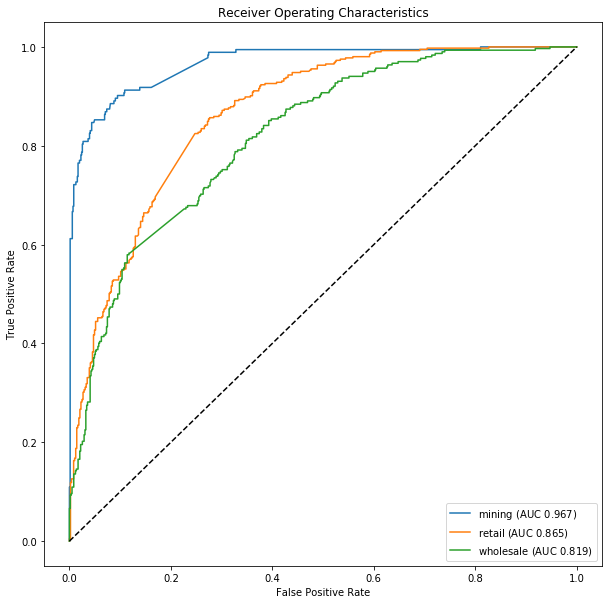

In [6]:
#2. Random Forest (criterion=gini, max_depth=20)
#data prepare: use the same train and test sets as logistic regression session.

#calculate
clf=sklearn.ensemble.RandomForestClassifier(criterion='gini', max_depth=20)
clf.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
train_data_df['predicted'] = clf.predict(np.stack(train_data_df['vect'], axis=0))
test_data_df['predicted'] = clf.predict(np.stack(test_data_df['vect'], axis=0))

print("For Train Data:")
print("accuracy ="+str(clf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, train_data_df))
print(" ")
print(" ")
print("For Test Data:")
print("accuracy ="+str(clf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, test_data_df))
print(" ")
print(" ")
print("Here is confusion matrix and ROC curve for Train and Test data:")
lucem_illud_2020.plotConfusionMatrix(clf, train_data_df)
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)
lucem_illud_2020.plotMultiROC(clf, train_data_df)
lucem_illud_2020.plotMultiROC(clf, test_data_df)

Thus, from the results above, we can see that Random Forest produces much better results than single decision tree.
By 'bagging', randomforest generate multiple results of decision trees and get a conclusion on these results, ignoring the unimportant text features and put more emphasis on the more significant features.
Thus, Random forest is a ensemble algorithm that improve decision tree.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [87]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data\20news_home\20news-bydate-train\talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, well, ..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data\20news_home\20news-bydate-train\talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data\20news_home\20news-bydate-train\talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data\20news_home\20news-bydate-train\talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data\20news_home\20news-bydate-train\talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[m, sorry, read, commandment]"


Make a testing and training set:

In [88]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [89]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [90]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [91]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [92]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.253627,0.559792,0.967742,0.369769,0.121212
comp.graphics,0.315728,0.643223,0.426891,0.355083,0.555799
talk.religion.misc,0.159025,0.725105,0.549669,0.380241,0.546053
sci.space,0.378990,0.620329,0.378272,0.337400,0.618844


And lets look at the testing data

In [93]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.31627906976744186


Let's produce another confusion matrix:

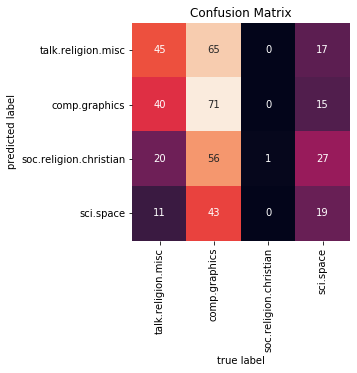

In [94]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [95]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

For Train Data:
accuracy =0.6546015712682379
precision =0.7318222853377799
recall =0.6546015712682379
F1 measure=0.6572971028557856
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.233446  0.762837   0.739577           0.659574  0.730209
wholesale    0.202862  0.715222   0.899676           0.596493  0.456861
mining       0.254489  0.769805   0.449892           0.405941  0.812500
 
 
For Test Data:
accuracy =0.39325842696629215
precision =0.44804086952959454
recall =0.39325842696629215
F1 measure=0.3727952200829348
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.442697  0.550643   0.514667           0.483463  0.476543
wholesale    0.346067  0.526304   0.464286           0.355463  0.129139
mining       0.424719  0.601047   0.273782  

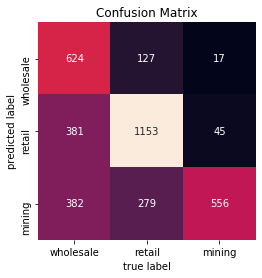

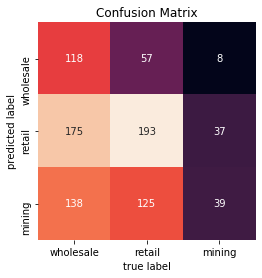

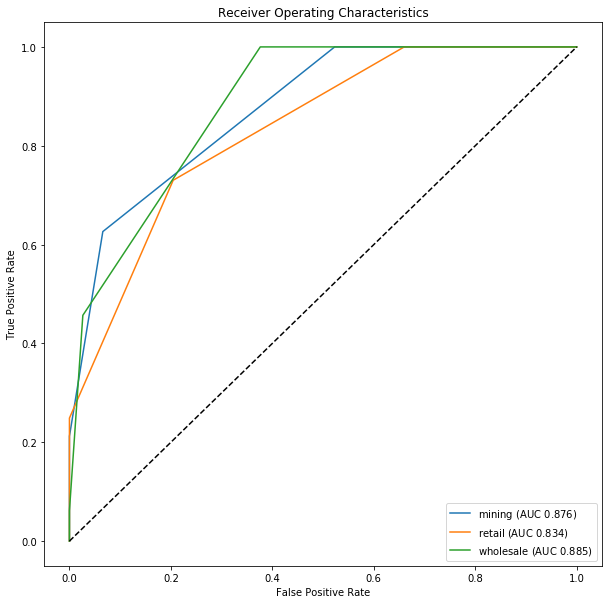

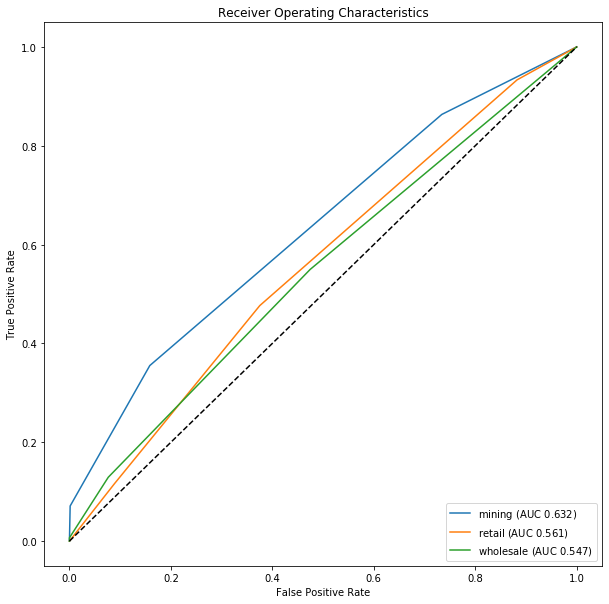

In [8]:
# KNN (neighbors=3)
#data prepare: use the same train and test sets as logistic regression session.

#calculate
clf=sklearn.neighbors.KNeighborsClassifier(3, weights='uniform')
clf.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
train_data_df['predicted'] = clf.predict(np.stack(train_data_df['vect'], axis=0))
test_data_df['predicted'] = clf.predict(np.stack(test_data_df['vect'], axis=0))

print("For Train Data:")
print("accuracy ="+str(clf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, train_data_df))
print(" ")
print(" ")
print("For Test Data:")
print("accuracy ="+str(clf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, test_data_df))
print(" ")
print(" ")
print("Here is confusion matrix and ROC curve for Train and Test data:")
lucem_illud_2020.plotConfusionMatrix(clf, train_data_df)
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)
lucem_illud_2020.plotMultiROC(clf, train_data_df)
lucem_illud_2020.plotMultiROC(clf, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


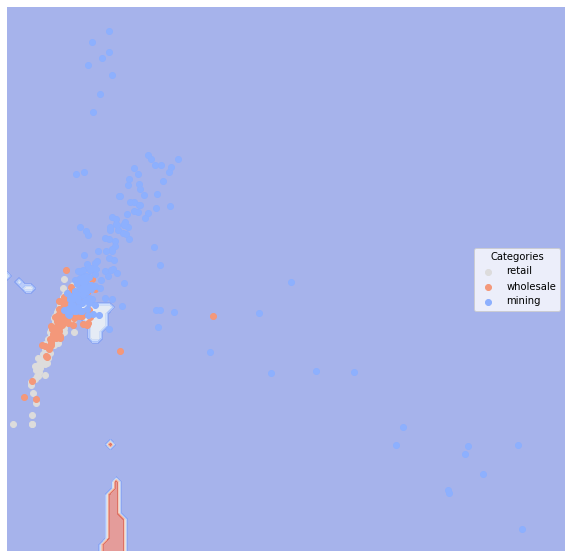

The relationship between KNN and K-means clustering:
k-Means Clustering is an unsupervised learning algorithm that is used for clustering,
The training process involves determining the distances of each data point to the centroids and re-assign each point to the closest cluster centroid based upon minimum distance
Thus, K-means clustering involves iteration.
In comparison, KNN is a supervised learning algorithm used for classification.
It does not involve any iteration process, it just remember the position of each node in the high-dimemsional space,
and assign labels to new nodes on the basis of machine memory.
Thus, this two algorithms have different tasks and mthematical processes.
The k for k-means clustering refers to the number of clusters, while k of KNN refers to the number of neighboring points whose labels should be considered.


In [9]:
#visualize the classification of data points
lucem_illud_2020.plotregions(clf, test_data_df)
print("The relationship between KNN and K-means clustering:")
print("k-Means Clustering is an unsupervised learning algorithm that is used for clustering,")
print("The training process involves determining the distances of each data point to the centroids and re-assign each point to the closest cluster centroid based upon minimum distance")
print("Thus, K-means clustering involves iteration.")
print("In comparison, KNN is a supervised learning algorithm used for classification.")
print("It does not involve any iteration process, it just remember the position of each node in the high-dimemsional space,")
print("and assign labels to new nodes on the basis of machine memory.")
print("Thus, this two algorithms have different tasks and mthematical processes.")
print("The k for k-means clustering refers to the number of clusters, while k of KNN refers to the number of neighboring points whose labels should be considered.")


# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [96]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [97]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [98]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [99]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

...and consider the results:

In [100]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.991515,0.987179,0.977658,0.987179
Bad Roommates: Tales of Irritation,0.021944,0.972033,0.948052,0.920033,0.960526
Tales From Tech Support,0.006270,0.990942,0.985915,0.975164,0.985915
Relationships,0.015674,0.979598,0.978495,0.956670,0.968085


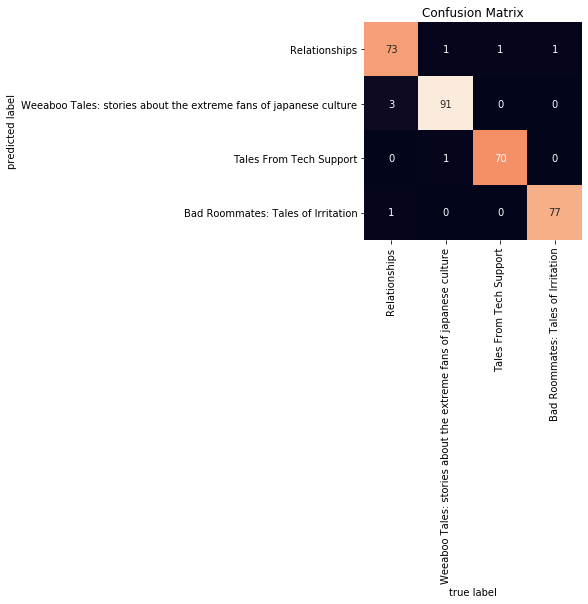

In [101]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

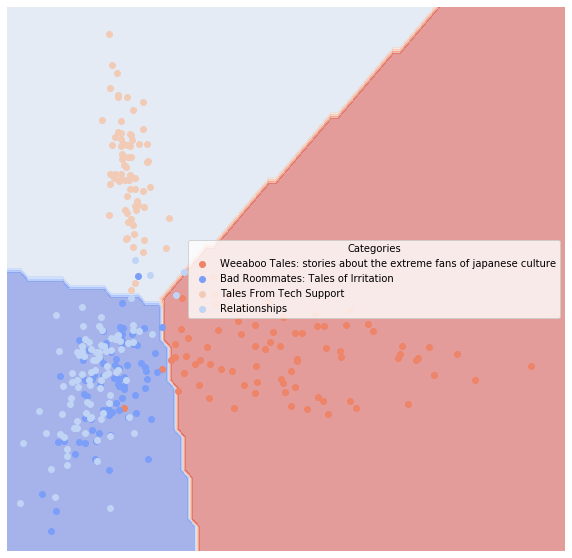

In [102]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [103]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [104]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Weeaboo Tales: stories about the extreme fans of japanese culture,0.009404,0.989440,0.974684,0.965322,0.987179
Bad Roommates: Tales of Irritation,0.018809,0.978612,0.948718,0.930021,0.973684
Tales From Tech Support,0.006270,0.990942,0.985915,0.975164,0.985915
Relationships,0.009404,0.984043,1.000000,0.977489,0.968085


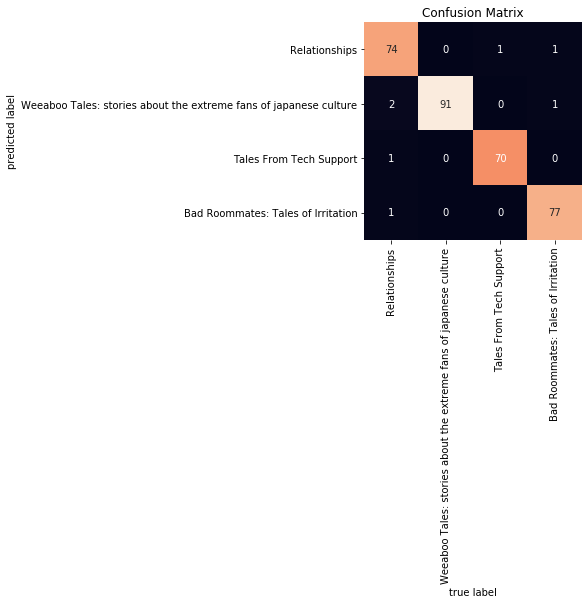

In [105]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

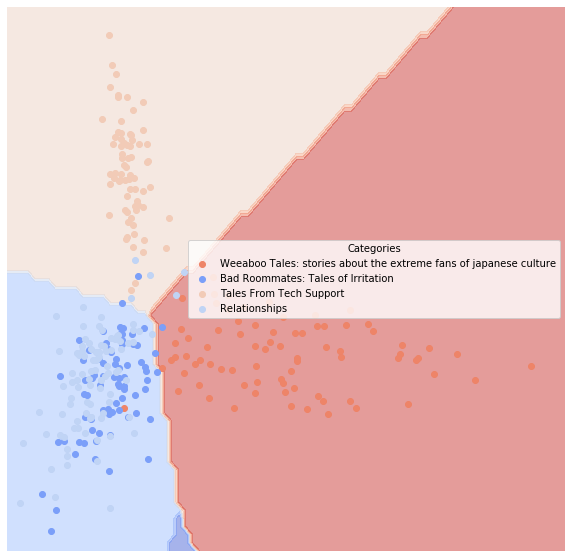

In [106]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

For Train Data:
accuracy =0.9882154882154882
precision =0.9885208241161356
recall =0.9882154882154882
F1 measure=0.9882151648791797
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.011785  0.989421    0.97409           0.974090  1.000000
wholesale    0.004489  0.993426    1.00000           0.991342  0.986853
mining       0.007295  0.983073    1.00000           0.973441  0.966146
 
 
For Test Data:
accuracy =0.7640449438202247
precision =0.7652732445778989
recall =0.7640449438202247
F1 measure=0.7638458203252072
Evaluation matrix:
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
retail       0.202247  0.798956   0.759815           0.702626  0.812346
wholesale    0.222472  0.746272   0.680556           0.560786  0.649007
mining       0.047191  0.913596   0.917160     

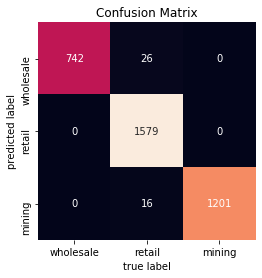

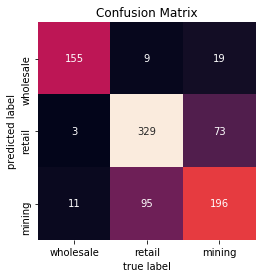

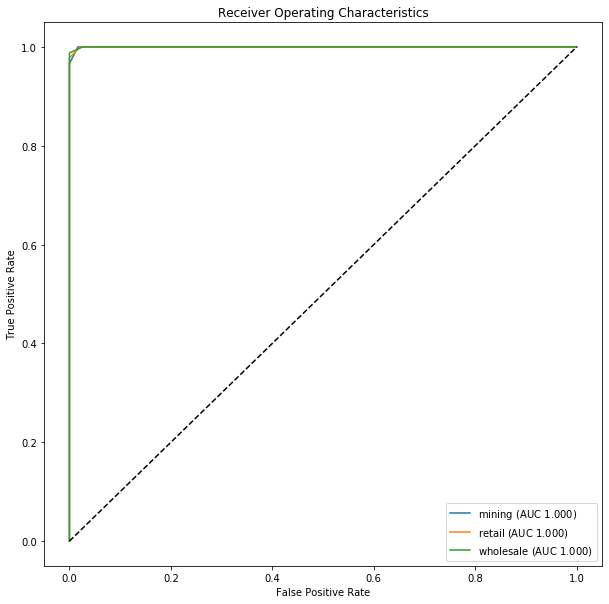

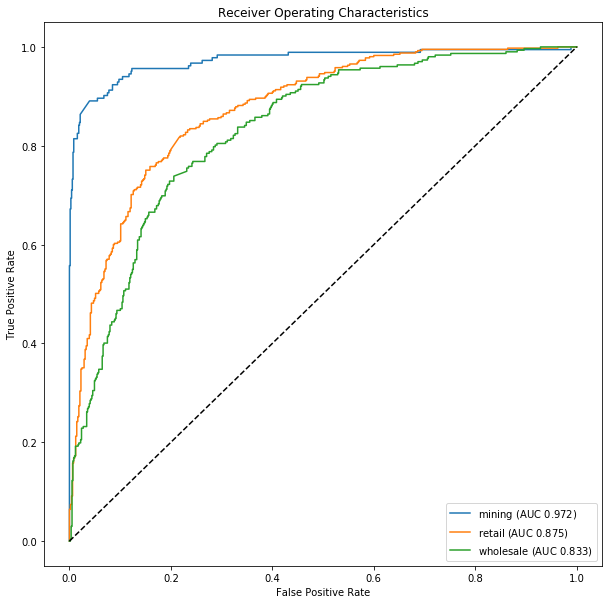

In [10]:
# neural network
#data prepare: use the same data as logistic regression.

#calculate
clf= sklearn.neural_network.MLPClassifier()
clf.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])
train_data_df['predicted'] = clf.predict(np.stack(train_data_df['vect'], axis=0))
test_data_df['predicted'] = clf.predict(np.stack(test_data_df['vect'], axis=0))

print("For Train Data:")
print("accuracy ="+str(clf.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(train_data_df['category'], train_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, train_data_df))
print(" ")
print(" ")
print("For Test Data:")
print("accuracy ="+str(clf.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category'])))
print("precision ="+str(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("recall ="+str(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("F1 measure="+str(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['predicted'], average = 'weighted')))
print("Evaluation matrix:")
print(lucem_illud_2020.evaluateClassifier(clf, test_data_df))
print(" ")
print(" ")
print("Here is confusion matrix and ROC curve for Train and Test data:")
lucem_illud_2020.plotConfusionMatrix(clf, train_data_df)
lucem_illud_2020.plotConfusionMatrix(clf, test_data_df)
lucem_illud_2020.plotMultiROC(clf, train_data_df)
lucem_illud_2020.plotMultiROC(clf, test_data_df)

From the measures above, we can see that neural network has a higher accuracy rate than KNN and decision tree, 
but similar to NB and logistic. 
Since this method is based on linear algebra and activation, it is most similar to logistic regression.
However, we can see that the accuracy of neural network for training set is extremely high (about 99%) while the accuracy for test set is relatively low (75%).
Thus, we can conclude that this model might have over-fitted the training set and has a low bias but high variance. 